In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# 1500 tuples of paired latitudes and longitudes

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# You can only unzip a zipped tuple once before it is removed from the computer's memory

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=2efe2f72d0cfb5dfd382d89849b7724f


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
 
# Loop through all the cities in the list using enumerate because index in URL will cause error.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | japura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kloulklubed
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | iringa
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cobija
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | tessalit
Processing Record 18 of Set 1 | pittsfield
Processing Record 19 of Set 1 | sambava
Processing Record 20 of Set 1 | plettenberg bay
Processing Reco

Processing Record 35 of Set 4 | carnarvon
Processing Record 36 of Set 4 | saskylakh
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | havoysund
Processing Record 40 of Set 4 | manokwari
Processing Record 41 of Set 4 | ikom
Processing Record 42 of Set 4 | rayachoti
Processing Record 43 of Set 4 | barbosa ferraz
Processing Record 44 of Set 4 | ardistan
City not found. Skipping...
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | epe
Processing Record 49 of Set 4 | bemidji
Processing Record 50 of Set 4 | sorland
Processing Record 1 of Set 5 | hanzhong
Processing Record 2 of Set 5 | disna
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | formosa
Processing Record 5 of Set 5 | lethem
Processing Record 6 of Set 5 | krasnyy tekstilshchik
City not found. Skipping...
Processing Record 7 of Set 5 | karwa

Processing Record 23 of Set 8 | eureka
Processing Record 24 of Set 8 | tual
Processing Record 25 of Set 8 | auki
Processing Record 26 of Set 8 | mandalgovi
Processing Record 27 of Set 8 | olafsvik
Processing Record 28 of Set 8 | acajutla
Processing Record 29 of Set 8 | warmbad
Processing Record 30 of Set 8 | sinkat
City not found. Skipping...
Processing Record 31 of Set 8 | marsh harbour
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | east hemet
Processing Record 34 of Set 8 | qena
Processing Record 35 of Set 8 | terra santa
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | svetlogorsk
Processing Record 39 of Set 8 | kakching
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | waingapu
Processing Record 42 of Set 8 | morant bay
Processing Record 43 of Set 8 | beira
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | udachnyy
Processing Record 46 of Set 8 

Processing Record 16 of Set 12 | taoudenni
Processing Record 17 of Set 12 | yamada
Processing Record 18 of Set 12 | lagos
Processing Record 19 of Set 12 | college
Processing Record 20 of Set 12 | malpe
Processing Record 21 of Set 12 | florida
Processing Record 22 of Set 12 | puno
Processing Record 23 of Set 12 | la mana
Processing Record 24 of Set 12 | de aar
Processing Record 25 of Set 12 | safwah
City not found. Skipping...
Processing Record 26 of Set 12 | tatishchevo
Processing Record 27 of Set 12 | shirokiy
Processing Record 28 of Set 12 | padang
Processing Record 29 of Set 12 | yuanping
Processing Record 30 of Set 12 | faanui
Processing Record 31 of Set 12 | phan rang
City not found. Skipping...
Processing Record 32 of Set 12 | angoche
Processing Record 33 of Set 12 | partizanskoye
Processing Record 34 of Set 12 | kenai
Processing Record 35 of Set 12 | alofi
Processing Record 36 of Set 12 | bang saphan
Processing Record 37 of Set 12 | ouadda
Processing Record 38 of Set 12 | leh
Pr

In [16]:
len(city_data)

582

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Japura,-0.3167,102.3500,24.00,87,100,0.75,ID,2021-04-01 01:19:12
1,Rikitea,-23.1203,-134.9692,25.84,72,100,6.41,PF,2021-04-01 01:19:12
2,San Quintin,30.4833,-115.9500,21.01,37,61,3.30,MX,2021-04-01 01:19:12
3,Albany,42.6001,-73.9662,10.56,70,100,7.60,US,2021-04-01 01:18:50
4,Kloulklubed,7.0419,134.2556,29.00,79,75,2.57,PW,2021-04-01 01:19:13
5,East London,-33.0153,27.9116,19.07,79,25,3.79,ZA,2021-04-01 01:19:13
6,Iringa,-7.7667,35.7000,14.39,93,50,2.43,TZ,2021-04-01 01:19:13
7,Port Alfred,-33.5906,26.8910,18.33,86,73,5.71,ZA,2021-04-01 01:19:14
8,New Norfolk,-42.7826,147.0587,23.89,33,100,0.89,AU,2021-04-01 01:19:14
9,Kruisfontein,-34.0033,24.7314,18.33,74,100,0.45,ZA,2021-04-01 01:17:21


In [18]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Japura,ID,2021-04-01 01:19:12,-0.3167,102.3500,24.00,87,100,0.75
1,Rikitea,PF,2021-04-01 01:19:12,-23.1203,-134.9692,25.84,72,100,6.41
2,San Quintin,MX,2021-04-01 01:19:12,30.4833,-115.9500,21.01,37,61,3.30
3,Albany,US,2021-04-01 01:18:50,42.6001,-73.9662,10.56,70,100,7.60
4,Kloulklubed,PW,2021-04-01 01:19:13,7.0419,134.2556,29.00,79,75,2.57
5,East London,ZA,2021-04-01 01:19:13,-33.0153,27.9116,19.07,79,25,3.79
6,Iringa,TZ,2021-04-01 01:19:13,-7.7667,35.7000,14.39,93,50,2.43
7,Port Alfred,ZA,2021-04-01 01:19:14,-33.5906,26.8910,18.33,86,73,5.71
8,New Norfolk,AU,2021-04-01 01:19:14,-42.7826,147.0587,23.89,33,100,0.89
9,Kruisfontein,ZA,2021-04-01 01:17:21,-34.0033,24.7314,18.33,74,100,0.45


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lngs = city_data_df["Lng"]

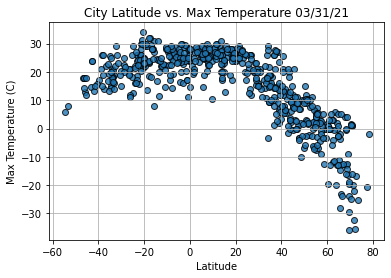

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

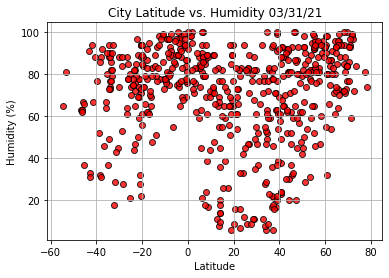

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity, color='red',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

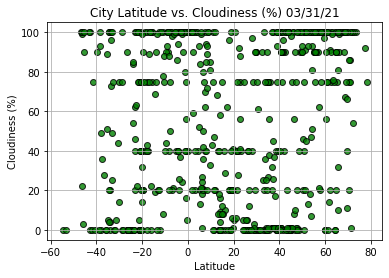

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness, color ='green',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

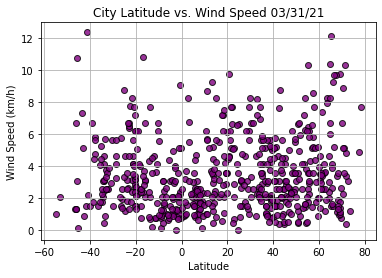

In [172]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed, color=('purple'),
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [161]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values,)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)


In [162]:
index13 = city_data_df.loc[13]
index13

City                     Tessalit
Country                        ML
Date          2021-04-01 01:19:15
Lat                       20.1986
Lng                        1.0114
Max Temp                    24.01
Humidity                        9
Cloudiness                      5
Wind Speed                   4.48
Name: 13, dtype: object

In [163]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

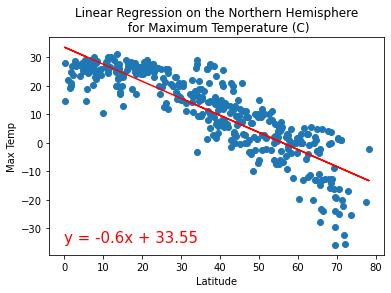

In [175]:
# Linear regression on the Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature (C)', 'Max Temp',(0,-35))
# plt.savefig("weather_data/Figx.png")


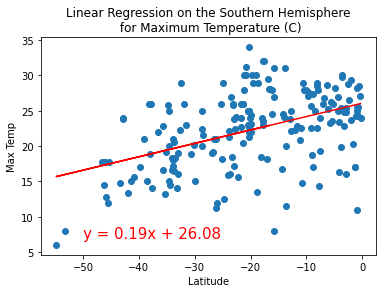

In [174]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature (C)', 'Max Temp',(-50,7))

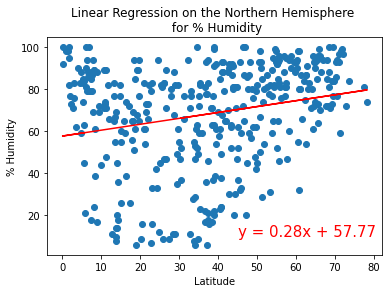

In [166]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

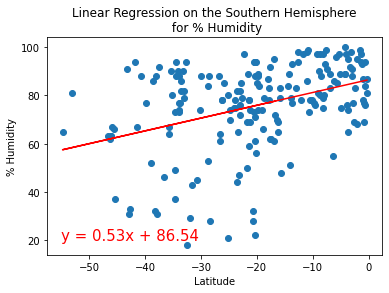

In [167]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-55,20))

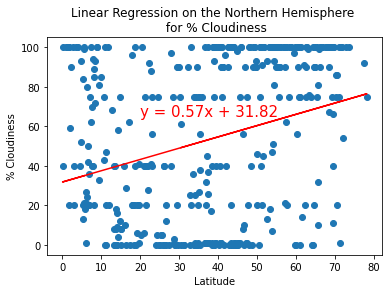

In [168]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,65))

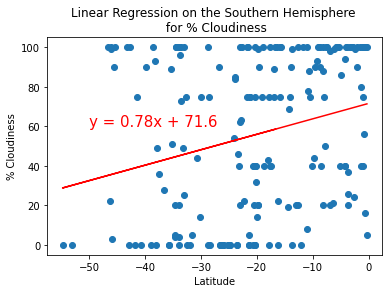

In [169]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [170]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)
# to skip values add comma and underscore (slope, intercept, r_value, _, _) = linregress(x, y)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.16x + 51.11
The r-value is: 0.130


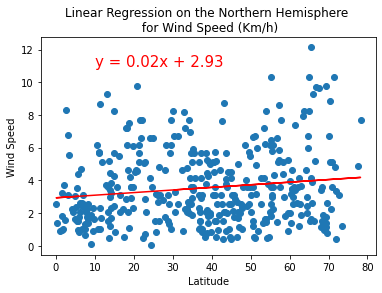

In [173]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (Km/h)', 'Wind Speed',(10,11))

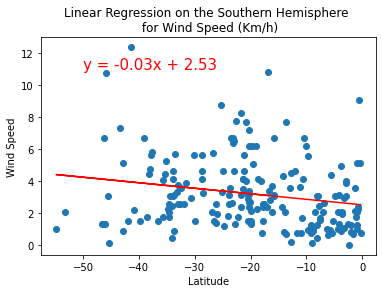

In [180]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (Km/h)', 'Wind Speed',(-50,11))